In [2]:
import pandas as pd
from utils.dbapi import DBapi


import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bertopic import BERTopic

from nltk import word_tokenize
import os.path as op
import re 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# import the preprocess doc

In [7]:
from dotenv import load_dotenv
load_dotenv()

db_api = DBapi()
with db_api:
    result = db_api.get_percentage('cleaned_description',0.4)
    df = pd.DataFrame(result)

INFO:root:Connexion à la base de données établie avec succès.
INFO:root:Connexion à la base de données fermée.


KeyboardInterrupt: 

In [3]:
seed_topic_list = [
    ["chicken", "beef", "pork", "lamb"],  # Meats
    ["carrot", "broccoli", "spinach", "tomato"],  # Vegetables
    ["apple", "banana", "orange", "strawberry"],  # Fruits
    ["cake", "pie", "cookie", "muffin"],  # Pastries
    ["appetizer", "starter", "canape", "hors d'oeuvre"],  # Appetizers and Starters
    ["soup", "stew", "broth", "bisque"],  # Soups and Stews
    ["salad", "greens", "dressing", "vinaigrette"],  # Salads
    ["main course", "entree", "dish", "platter"],  # Main Dishes
    ["side dish", "accompaniment", "garnish", "sides"],  # Side Dishes
    ["dessert", "pudding", "sweet", "treat"],  # Desserts
    ["beverage", "drink", "cocktail", "juice"],  # Beverages
    ["breakfast", "brunch", "morning meal", "cereal"],  # Breakfast Dishes
    ["vegetarian", "meatless", "plant-based", "veggie"],  # Vegetarian Recipes
    ["vegan", "dairy-free", "egg-free", "plant-based"],  # Vegan Recipes
    ["gluten-free", "no gluten", "wheat-free", "celiac"],  # Gluten-Free Recipes
    ["dairy-free", "lactose-free", "milk-free", "non-dairy"],  # Dairy-Free Recipes
    ["low carb", "keto", "low carbohydrate", "atkins"],  # Low-Carb Recipes
    ["high protein", "protein-rich", "bodybuilding", "muscle"],  # High Protein Recipes
    ["beef", "steak", "ground beef", "roast"],  # Beef Dishes
    ["chicken", "poultry", "hen", "roast chicken"],  # Poultry Dishes
    ["seafood", "fish", "shrimp", "lobster"],  # Seafood Dishes
    ["pasta", "spaghetti", "noodles", "macaroni"],  # Pasta Dishes
    ["rice", "risotto", "pilaf", "paella"],  # Rice Dishes
    ["bread", "loaf", "baguette", "roll"],  # Breads and Bakery
    ["sauce", "gravy", "dressing", "dip"],  # Sauces and Condiments
    ["snack", "nibble", "munchies", "bite"],  # Snacks and Appetizers
    ["grill", "barbecue", "bbq", "smoke"],  # Grilling and BBQ
    ["bake", "oven", "roast", "pastry"],  # Baking Recipes
    ["slow cooker", "crockpot", "stew", "braise"],  # Slow Cooker Recipes
    ["pressure cooker", "instant pot", "quick cook", "fast"],  # Pressure Cooker Recipes
    ["one-pot", "one-pan", "easy cleanup", "simple"],  # One-Pot Meals
    ["casserole", "bake", "gratin", "hotdish"],  # Casseroles and Bakes
    ["sandwich", "wrap", "panini", "sub"],  # Sandwiches and Wraps
    ["pizza", "flatbread", "margherita", "pepperoni"],  # Pizza and Flatbreads
    ["souffle", "quiche", "custard", "flan"],  # Soufflés and Quiches
    ["tart", "pie", "pastry", "flan"],  # Savory and Sweet Tarts
    ["cookie", "biscuit", "shortbread", "gingerbread"],  # Cookies and Biscuits
    ["cake", "cupcake", "sponge", "layer cake"],  # Cakes and Pastries
    ["ice cream", "gelato", "sorbet", "frozen yogurt"],  # Ice Creams and Frozen Desserts
    ["smoothie", "shake", "blender", "frappe"],  # Smoothies and Juices
    ["cocktail", "mocktail", "martini", "margarita"],  # Cocktails and Mocktails
    ["tea", "coffee", "latte", "espresso"],  # Tea and Coffee Beverages
    ["asian", "chinese", "japanese", "korean"],  # Asian Cuisine
    ["italian", "pasta", "pizza", "risotto"],  # Italian Cuisine
    ["french", "croissant", "baguette", "ratatouille"],  # French Cuisine
    ["mexican", "taco", "enchilada", "quesadilla"],  # Mexican Cuisine
    ["indian", "curry", "masala", "naan"],  # Indian Cuisine
    ["middle eastern", "hummus", "falafel", "pita"],  # Middle Eastern Cuisine
    ["mediterranean", "olive", "feta", "tzatziki"],  # Mediterranean Cuisine
    ["african", "jollof", "injera", "tagine"],  # African Cuisine
    ["american", "burger", "hot dog", "fries"],  # American Cuisine
    ["british", "fish and chips", "shepherd's pie", "pudding"],  # British Cuisine
    ["spanish", "paella", "tapas", "gazpacho"],  # Spanish Cuisine
    ["thai", "pad thai", "green curry", "lemongrass"],  # Thai Cuisine
    ["chinese", "dumpling", "stir-fry", "sweet and sour"],  # Chinese Cuisine
    ["japanese", "sushi", "tempura", "ramen"],  # Japanese Cuisine
    ["korean", "kimchi", "bibimbap", "bulgogi"],  # Korean Cuisine
    ["german", "sauerkraut", "bratwurst", "pretzel"],  # German Cuisine
    ["greek", "gyros", "moussaka", "feta"],  # Greek Cuisine
    ["scandinavian", "smorrebrod", "gravlax", "meatballs"],  # Scandinavian Cuisine
    ["russian", "borscht", "blini", "pelmeni"],  # Russian Cuisine
    ["brazilian", "feijoada", "pão de queijo", "churrasco"],  # Brazilian Cuisine
    ["moroccan", "couscous", "tagine", "harira"],  # Moroccan Cuisine
    ["holiday", "celebration", "feast", "festive"],  # Holiday Recipes
    ["christmas", "gingerbread", "turkey", "eggnog"],  # Christmas Recipes
    ["easter", "lamb", "hot cross buns", "eggs"],  # Easter Recipes
    ["halloween", "pumpkin", "candy", "toffee"],  # Halloween Recipes
    ["thanksgiving", "stuffing", "cranberry", "pumpkin pie"],  # Thanksgiving Recipes
    ["valentine", "chocolate", "strawberries", "romantic"],  # Valentine's Day Recipes
    ["mother's day", "brunch", "flowers", "tea"],  # Mother's Day Recipes
    ["father's day", "bbq", "steak", "beer"],  # Father's Day Recipes
    ["new year", "champagne", "appetizers", "resolutions"],  # New Year's Recipes
    ["summer", "grill", "salad", "lemonade"],  # Summer Recipes
    ["autumn", "pumpkin", "apple", "spice"],  # Autumn Recipes
    ["winter", "stew", "soup", "hot chocolate"],  # Winter Recipes
    ["spring", "asparagus", "lamb", "peas"],  # Spring Recipes
    ["picnic", "sandwich", "fruit", "salad"],  # Picnic Recipes
    ["party", "finger food", "canapes", "dip"],  # Party Recipes
    ["kids", "fun", "easy", "snacks"],  # Recipes for Kids
    ["budget", "cheap", "affordable", "economical"],  # Budget Recipes
    ["quick", "easy", "fast", "simple"],  # Quick and Easy Recipes
    ["gourmet", "fine dining", "chef", "sophisticated"],  # Gourmet Recipes
    ["healthy", "nutrition", "low-fat", "whole grains"],  # Healthy Recipes
    ["comfort food", "hearty", "homestyle", "satisfying"],  # Comfort Foods
    ["street food", "taco", "kebab", "noodle"],  # Street Foods
    ["festive desserts", "cake", "pie", "tart"],  # Festive Desserts
    ["gluten-free baking", "almond flour", "coconut flour", "xanthan gum"],  # Gluten-Free Baking
    ["low-fat", "light", "diet", "skinny"],  # Low-Fat Recipes
    ["diabetic", "sugar-free", "low carb", "glycemic"],  # Diabetic Recipes
    ["lactose-free", "dairy-free", "soy milk", "almond milk"],  # Lactose-Free Recipes
    ["high fiber", "whole grain", "bran", "fiber-rich"],  # High Fiber Recipes
    ["paleo", "grain-free", "primal", "caveman"],  # Paleo Recipes
    ["ketogenic", "keto", "low carb", "high fat"],  # Keto Recipes
    ["raw food", "uncooked", "vegan", "living foods"],  # Raw Food Recipes
    ["fermented", "kimchi", "sauerkraut", "kombucha"],  # Fermented Foods
    ["superfood", "quinoa", "chia", "kale"],  # Superfood Recipes
    ["seafood appetizer", "shrimp cocktail", "oysters", "ceviche"],  # Seafood Appetizers
    ["meatless main", "vegetarian", "tofu", "eggplant"],  # Meatless Main Dishes
    ["egg dishes", "omelette", "scrambled", "frittata"],  # Egg Dishes
    ["cheese dishes", "fondue", "mac and cheese", "grilled cheese"],  # Cheese Dishes
    ["tofu", "soy", "tempeh", "seitan"],  # Tofu and Soy Recipes
    ["beans", "lentils", "chickpeas", "legumes"],  # Beans and Legumes
    ["grain-free", "paleo", "almond flour", "coconut flour"],  # Grain-Free Recipes
    ["whole grains", "brown rice", "quinoa", "oats"],  # Whole Grain Recipes
    ["vinaigrette", "dressing", "salad dressing", "balsamic"],  # Vinaigrettes
    ["marinade", "rub", "seasoning", "spice mix"],  # Marinades and Rubs
    ["breakfast cereal", "granola", "muesli", "oatmeal"],  # Breakfast Cereals
    ["pancake", "waffle", "crepe", "flapjack"],  # Pancakes and Waffles
    ["omelette", "frittata", "scramble", "quiche"],  # Omelettes and Frittatas
    ["sushi", "nigiri", "maki", "sashimi"],  # Sushi and Sashimi
    ["dumpling", "dim sum", "gyoza", "wonton"],  # Dumplings and Dim Sum
    ["tapas", "mezze", "small plates", "antipasti"],  # Tapas and Small Plates
    ["spicy", "hot", "chili", "pepper"],  # Spicy Recipes
    ["mild", "light", "delicate", "subtle"],  # Mild and Delicate Flavors
    ["herb", "basil", "thyme", "rosemary"],  # Herb-Based Recipes
    ["spice", "cumin", "cinnamon", "turmeric"],  # Spice-Based Recipes
    ["chocolate dessert", "brownie", "mousse", "truffle"],  # Chocolate Desserts
    ["fruit dessert", "cobbler", "crumble", "tart"],  # Fruit Desserts
    ["gelato", "sorbet", "frozen yogurt", "popsicle"],  # Gelato and Sorbets
    ["custard", "pudding", "crème brûlée", "flan"],  # Custards and Puddings
    ["mousse", "parfait", "whipped", "airy"],  # Mousses and Parfaits
    ["bread pudding", "custard", "raisin", "vanilla"],  # Bread Puddings
    ["traditional bread", "sourdough", "rye", "whole wheat"],  # Traditional Breads
    ["sourdough", "starter", "levain", "fermented"],  # Sourdough Recipes
    ["flatbread", "naan", "pita", "chapati"],  # Flatbreads and Naan
    ["crepe", "blini", "pancake", "galette"],  # Crepes and Blinis
    ["stuffed pasta", "ravioli", "tortellini", "manicotti"],  # Stuffed Pastas
    ["risotto", "paella", "arborio", "saffron"],  # Risotto and Paella
    ["stir-fry", "wok", "sauté", "quick cook"],  # Stir-Fries
    ["curry", "masala", "korma", "vindaloo"],  # Curries
    ["kebab", "skewer", "satay", "yakitori"],  # Kebabs and Skewers
    ["noodle dish", "ramen", "lo mein", "pad thai"],  # Noodle Dishes
    ["meal salad", "chicken salad", "tuna salad", "grain salad"],  # Meal Salads
    ["baked seafood", "fish fillet", "shrimp scampi", "lobster tail"],  # Baked Seafood
    ["steamed dish", "dim sum", "fish", "vegetables"],  # Steamed Dishes
    ["roasted vegetables", "root vegetables", "squash", "brussels sprouts"],  # Roasted Vegetables
    ["gratin", "au gratin", "cheesy", "baked"],  # Gratins
    ["preservation", "pickling", "canning", "fermenting"],  # Food Preservation
    ["pickle", "chutney", "relish", "sauerkraut"],  # Pickles and Chutneys
    ["jam", "jelly", "preserve", "marmalade"],  # Jams and Jellies
    ["canning", "jar", "preserving", "mason jar"],  # Canning and Jarring
    ["dehydrated", "dried fruit", "beef jerky", "fruit leather"],  # Dehydrated Foods
    ["vegan dessert", "dairy-free", "egg-free", "raw"],  # Vegan Desserts
    ["energy bar", "granola bar", "protein bar", "snack bar"],  # Energy Bars and Bites
    ["protein shake", "smoothie", "whey", "post-workout"],  # Protein Shakes
    ["meal prep", "batch cooking", "make ahead", "freezer meals"],  # Meal Prep Recipes
    ["seasonal soup", "gazpacho", "pumpkin soup", "minestrone"],  # Soups for All Seasons
    ["comfort stew", "beef stew", "chili", "goulash"],  # Comforting Stews
    ["chili", "con carne", "beans", "spicy"],  # Chili Recipes
    ["game meat", "venison", "rabbit", "wild boar"],  # Game Meat Recipes
    ["exotic", "truffle", "foie gras", "caviar"],  # Exotic Ingredients
    ["fusion", "tex-mex", "asian-fusion", "cross-cultural"],  # Fusion Cuisine
    ["restaurant-style", "copycat", "gourmet", "signature"],  # Restaurant-Style Recipes
    ["street food", "empanada", "spring roll", "arepa"],  # Street Foods from Around the World
    ["healthy snack", "nuts", "fruit", "yogurt"],  # Healthy Snacks
    ["on-the-go breakfast", "breakfast bar", "muffin", "wrap"],  # Grab-and-Go Breakfasts
    ["brunch favorite", "eggs benedict", "pancakes", "mimosa"],  # Brunch Favorites
    ["afternoon tea", "scone", "finger sandwich", "petit four"],  # Afternoon Tea Recipes
    ["traditional", "stew", "roast", "casserole"],  # Traditional Dishes
    ["family recipe", "heirloom", "passed down", "comfort"],  # Family Recipes
    ["grandma's recipe", "nostalgic", "old-fashioned", "classic"],  # Grandma's Recipes
    ["regional", "gumbo", "poutine", "sauerbraten"],  # Regional Specialties
    ["very spicy", "ghost pepper", "habanero", "scotch bonnet"],  # Very Spicy Dishes
    ["mild dish", "butter chicken", "creamy", "gentle flavors"],  # Mild Dishes
    ["savory snack", "chips", "nuts", "pretzels"],  # Savory Snacks
    ["sweet treat", "candy", "dessert", "chocolate"],  # Sweet Treats
    ["savory pastry", "sausage roll", "empanada", "pasty"],  # Savory Pastries
    ["international dessert", "baklava", "tiramisu", "gulab jamun"],  # International Desserts
    ["wedding cake", "tiered cake", "fondant", "white cake"],  # Wedding Cakes
    ["birthday cake", "layer cake", "frosting", "candles"],  # Birthday Cakes
    ["holiday cookies", "sugar cookies", "gingerbread", "shortbread"],  # Holiday Cookies
    ["gingerbread house", "decorating", "royal icing", "candy"],  # Gingerbread Creations
    ["chocolate making", "truffles", "ganache", "tempering"],  # Chocolate Making
    ["candy making", "fudge", "caramel", "toffee"],  # Confectionery
    ["herb preservation", "drying herbs", "herb oil", "herb vinegar"],  # Preserving Herbs
    ["homemade pasta", "fresh pasta", "pasta dough", "pasta machine"],  # Homemade Pasta
    ["dumpling wrapper", "wonton skin", "gyoza wrapper", "homemade"],  # Dumpling Wrappers
    ["vegetarian protein", "tofu", "beans", "lentils"],  # Vegetarian Proteins
    ["vegan baking", "egg substitute", "flax egg", "aquafaba"],  # Vegan Baking
    ["low sugar", "sugar substitute", "stevia", "erythritol"],  # Low Sugar Recipes
    ["sugar-free", "diabetic-friendly", "artificial sweetener", "no sugar"],  # Sugar-Free Recipes
    ["detox", "cleanse", "green juice", "smoothie"],  # Detox Recipes
    ["juice", "cold-pressed", "fruit juice", "vegetable juice"],  # Juice Recipes
    ["mocktail", "non-alcoholic", "smoothie", "punch"],  # Mocktails
    ["traditional drink", "chai", "matcha", "horchata"],  # Traditional Beverages
    ["smoothie bowl", "acai bowl", "toppings", "granola"],  # Smoothie Bowls
    ["breakfast muffin", "bran muffin", "blueberry muffin", "banana muffin"],  # Breakfast Muffins
    ["specialty bread", "focaccia", "brioche", "ciabatta"],  # Specialty Breads
    ["festive drink", "eggnog", "mulled wine", "cider"],  # Festive Beverages
    ["bbq sauce", "smoky", "sweet", "tangy"],  # BBQ Sauces
    ["mayonnaise", "aioli", "emulsion", "garlic mayo"],  # Mayonnaises and Aiolis
    ["spice blend", "curry powder", "garam masala", "taco seasoning"],  # Homemade Spice Blends
    ["gluten-free dessert", "almond flour cake", "flourless brownie", "meringue"],  # Gluten-Free Desserts
    ["alternative flour", "almond flour", "coconut flour", "buckwheat"],  # Alternative Flours
    ["nut-free", "seed butter", "sunflower seeds", "coconut"],  # Nut-Free Recipes
    ["allergen-free", "dairy-free", "gluten-free", "egg-free"],  # Allergen-Free Recipes
    ["baby food", "puree", "mashed", "soft"],  # Baby Recipes
    ["toddler meal", "finger food", "bite-sized", "soft"],  # Toddler Meals
    ["senior nutrition", "soft food", "easy to chew", "nutritious"],  # Nutrition for Seniors
    ["sports nutrition", "protein", "carb loading", "recovery"],  # Sports Nutrition
    ["food pairing", "wine pairing", "cheese pairing", "flavor combinations"],  # Food Pairings
    ["cooking technique", "sauteing", "braising", "blanching"],  # Cooking Techniques
]


In [4]:


df = df

documents = df['cleaned_description'].to_list()

# BERTopic (sans n-gram)
import hdbscan

n_gram_range = (1, 2)

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=100, prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model, seed_topic_list=seed_topic_list, n_gram_range = n_gram_range, top_n_words = 5 ,language="english")

# TODO : Faire fonctionner BERTopic


In [5]:
n_topics = 0
while n_topics < 10:
    topics, probs = topic_model.fit_transform(documents)
    n_topics = len(set(topics))
df['topic'] = topics
df['probs'] = probs
    # Afficher les topics les plus fréquents
print(topic_model.get_topic_info())




INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


    Topic  Count                                             Name  \
0      -1  40755                      -1_dish_sauce_chicken_salad   
1       0   2156                       0_family_mom_husband_years   
2       1   1546              1_magazine_home magazine_issue_food   
3       2   1339      2_cookbook_cookbook cookbook_cookbooks_book   
4       3   1317                    3_soup_soup soup_soups_hearty   
..    ...    ...                                              ...   
67     66    113                   66_nuts_walnuts_pecans_almonds   
68     67    111                            67_ribs_rib_bbq_grill   
69     68    111              68_sandwich_sandwiches_cheese_bread   
70     69    111  69_meatballs_meatball_meatballs meatballs_sauce   
71     70    111                    70_grill_bbq_barbecue_foreman   

                                       Representation  \
0               [dish, sauce, chicken, salad, flavor]   
1               [family, mom, husband, years, friend]   


In [ ]:
print(topic_model.get_topic(-1)) 
# Visualisation des topics
topic_model.visualize_topics()


[('dish', 0.00899523634939025), ('sauce', 0.008616173787161958), ('chicken', 0.008412180208918778), ('salad', 0.005838373305643085), ('flavor', 0.005582790629521052)]


In [12]:
# Visualisation des hiérarchies entre les topics
topic_model.visualize_hierarchy()



In [13]:
# Visualisation des relations entre les topics
topic_model.visualize_barchart(n_words=10, height=400, width=400)




In [14]:
topic_model.visualize_heatmap(n_clusters=7)

In [7]:
topic_model.save("../models/model_cluster", save_embedding_model=True)

2024-12-01 14:11:51,703 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [15]:
topic_model_test = BERTopic.load("../models/model_cluster")

In [12]:
db_api = DBapi()
with db_api:
    result = db_api.get_percentage('cleaned_description',0.0001)
    df_test = pd.DataFrame(result)

INFO:root:Connexion à la base de données établie avec succès.
INFO:root:17 documents trouvés pour cleaned_description avec un pourcentage de 0.0001.
INFO:root:Connexion à la base de données fermée.


In [13]:
df_test.head()

,cleaned_description
0,"['moms', 'table', 'sweetness', 'apples', 'fami..."
1,"['snack', 'food', 'magazine', 'dec', 'issue']"
2,"['cream', 'mushroon', 'soup', 'cream', 'chicke..."
3,"['teenager', 'eating', 'friends', 'house', 'ha..."
4,"['pizza', 'muffins', 'appetizers']"


In [14]:
for description in df_test['cleaned_description']:
    print(topic_model.transform(description))

([-1], array([0.]))
([2], array([0.86713051]))
([-1], array([0.]))
([-1], array([0.]))
([23], array([0.90755066]))
([10], array([0.80679453]))
([-1], array([0.]))
([4], array([0.88244484]))
([-1], array([0.]))
([-1], array([0.]))
([-1], array([0.]))
([-1], array([0.]))
([-1], array([0.]))
([-1], array([0.]))
([-1], array([0.]))
([-1], array([0.]))
([-1], array([0.]))


In [9]:


# Obtenir les documents non assignés (topic -1)
outliers = df[df["topic"] == -1]["cleaned_description"].tolist()

# Vérifier le nombre de documents non assignés
print(f"Nombre de documents non assignés : {len(outliers)}")

Nombre de documents non assignés : 40755


In [18]:

new_topic_model = BERTopic(hdbscan_model=hdbscan.HDBSCAN(min_cluster_size=80,  prediction_data=True),
                        seed_topic_list=seed_topic_list,
                        n_gram_range=(1, 2),
                        language="english")
new_topics, new_probs = new_topic_model.fit_transform(outliers)


new_topics_dict = new_topic_model.get_topics()

print(new_topic_model.get_topic_info())

INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


    Topic  Count                                               Name  \
0      -1   1447              -1_spaghetti_family_brisket_casserole   
1       0  38260                         0_dish_sauce_chicken_salad   
2       1    174                 1_taste home_home_home taste_taste   
3       2    114                           2_fat_tasty_taste_tastes   
4       3    110  3_request_request request_response request_res...   
5       4    105               4_cooking_cooking cooking_cook_beach   
6       5    101                5_cake_salad_salad salad_salad cake   
7       6     98  6_cookbook cookbook_cookbook_cookbooks_bisquic...   
8       7     91                 7_soup_quick_soup soup_quick quick   
9       8     87              8_yum_yum yum_yumzwt mexico_plate yum   
10      9     86                  9_meal meal_meal_meals meal_meals   
11     10     82                     10_kids_kids kids_kid_kids kid   

                                       Representation  \
0   [spaghetti, fam

In [17]:
topic_model_test.visualize_barchart(n_words=10, height=400, width=400)

In [26]:

# Récupérer les topics des deux modèles
original_topics = topic_model.get_topics()
# Recaler les IDs des topics du nouveau modèle
max_topic_id = max(original_topics.keys())
reindexed_new_topics = {
    topic_id + max_topic_id + 1: terms
    for topic_id, terms in new_topics_dict.items()
}
new_topic_model.get_topic_info()
# Fusionner les topics
merged_topics = {**original_topics, **reindexed_new_topics}

# Réattribuer les documents non assignés avec les nouveaux topics
outlier_indices = df[df["topic"] == -1].index
df.loc[outlier_indices, "topic"] = [topic_id + max_topic_id + 1 for topic_id in new_topics[:len(outlier_indices)]]

# Mettre à jour le modèle initial avec les nouveaux topics
topic_ids = df["topic"].tolist()
topic_model.update_topics(docs=df["cleaned_description"].tolist(), topics=topic_ids)

# Sauvegarder le modèle fusionné
topic_model.save("merged_model_cluster", save_embedding_model=True)

2024-11-30 19:42:15,599 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.
2024-11-30 19:42:19,598 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [28]:
model_topic_bert = BERTopic.load("merged_model_cluster")

In [29]:
print(model_topic_bert.get_topic_info())

    Topic  Count                                 Name  \
0       0   3219          0_family_party_husband_kids   
1       1   1506            1_soup_soups_hearty_broth   
2       2   1487         2_magazine_issue_womans_home   
3       3   1332    3_cookbook_book_cookbooks_booklet   
4       4   1288    4_cookies_cookie_chocolate_peanut   
..    ...    ...                                  ...   
73     73    105        73_bread_potatoes_potato_loaf   
74     74    103  74_spaghetti_meatballs_pasta_change   
75     75     98         75_yum_yumzwt_scrum_yumsugar   
76     76     95   76_appetizer_online_appetizers_msn   
77     77     84       77_yummy_lunch_lunches_yummmmy   

                                       Representation  \
0   [family, party, husband, kids, dinner, parties...   
1   [soup, soups, hearty, broth, stock, dumplings,...   
2   [magazine, issue, womans, home, food, magazine...   
3   [cookbook, book, cookbooks, booklet, church, c...   
4   [cookies, cookie, chocolat

In [30]:
model_topic_bert.update_topics(docs=df["cleaned_description"].tolist(), topics=topic_ids)

2024-11-30 19:43:25,973 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [31]:
print(model_topic_bert.get_topic_info())

    Topic  Count                                 Name  \
0       0   3219          0_family_party_husband_kids   
1       1   1506            1_soup_soups_hearty_broth   
2       2   1487         2_magazine_issue_womans_home   
3       3   1332    3_cookbook_book_cookbooks_booklet   
4       4   1288    4_cookies_cookie_chocolate_peanut   
..    ...    ...                                  ...   
73     73    105        73_bread_potatoes_potato_loaf   
74     74    103  74_spaghetti_meatballs_pasta_change   
75     75     98         75_yum_yumzwt_scrum_yumsugar   
76     76     95   76_appetizer_online_appetizers_msn   
77     77     84       77_yummy_lunch_lunches_yummmmy   

                                       Representation  \
0   [family, party, husband, kids, dinner, parties...   
1   [soup, soups, hearty, broth, stock, dumplings,...   
2   [magazine, issue, womans, home, food, magazine...   
3   [cookbook, book, cookbooks, booklet, church, c...   
4   [cookies, cookie, chocolat

In [32]:
# top topics

topic_counts = df["topic"].value_counts().sort_values(ascending=False)
print(topic_counts)



topic
65    36418
0      3219
64     3094
1      1506
2      1487
      ...  
73      105
74      103
75       98
76       95
77       84
Name: count, Length: 78, dtype: int64


In [34]:
# Obtenir les documents non assignés (topic -1)
outliers = df[df["topic"] == 65]["cleaned_description"].tolist()

# Vérifier le nombre de documents non assignés
print(f"Nombre de documents non assignés : {len(outliers)}")

Nombre de documents non assignés : 36418


In [36]:

new_topic_model = BERTopic(hdbscan_model=hdbscan.HDBSCAN(min_cluster_size=80, prediction_data=True),
                            language="english")
new_topics, new_probs = new_topic_model.fit_transform(outliers)


new_topics_dict = new_topic_model.get_topics()

print(new_topic_model.get_topic_info())

INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: cpu
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disa

   Topic  Count                              Name  \
0     -1   2192   -1_eggs_waffles_alfredo_chowder   
1      0  33860        0_dish_sauce_chicken_salad   
2      1    165        1_bon_appetit_source_issue   
3      2    115         2_taste_home_tastes_homes   
4      3     86  3_accompaniment_meal_dishes_meat   

                                      Representation  \
0  [eggs, waffles, alfredo, chowder, version, chi...   
1  [dish, sauce, chicken, salad, family, way, tas...   
2  [bon, appetit, source, issue, november, decemb...   
3  [taste, home, tastes, homes, source, tasteofho...   
4  [accompaniment, meal, dishes, meat, dish, sala...   

                                 Representative_Docs  
0  [['way', 'chicken'], ['chicken', 'way'], ['chi...  
1  [['way', 'apples', 'autumn', 'day', 'cinnamon'...  
2  [['side', 'dish', 'bon', 'appetit'], ['bon', '...  
3  [['taste', 'home'], ['taste', 'home'], ['taste...  
4  [['accompaniment', 'dishes'], ['bread', 'accom...  


In [14]:

model_topic_bert = BERTopic.load("../models/model_cluster")

model_topic_bert.visualize_barchart(n_words=10, height=400, width=400)

In [34]:
df = pd.read_csv("../data/processed_data.csv")  
import ast

df['rating'] = df['rating'].apply(lambda x: ast.literal_eval(x))

df['n_comments'] = df['rating'].apply(lambda x: len(x))

#filter pour garder que les recettes qui ont plus de 10 commentaires
df = df[df['n_comments'] > 10]

df_cluster= pd.DataFrame()
#passer les descriptions dans Bertopic
df_cluster = df[['description','cleaned_description', 'rating', 'submitted']].sample(n=10000)
documents = df_cluster['cleaned_description'].to_list()
topics, probs = model_topic_bert.transform(documents)
df_cluster['cleaned_description'] = documents
df_cluster['topic'] = topics


In [35]:
df_cluster = df_cluster[df_cluster['topic'] != -1]

In [36]:
df_cluster.reset_index(drop=True, inplace=True)


In [37]:
df_cluster

,description,cleaned_description,rating,submitted,topic
0,5-ingredient fix contest entry.\r\n have you ...,"['fix', 'contest', 'entry', 'cabbage', 'pocket...","[5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5, ...",2013-03-09,43
1,"this recipe came from my mother, jean godden, ...","['mother', 'godden', 'family', 'children']","[5, 4, 3, 5, 4, 5, 5, 4, 4, 5, 0]",2001-11-14,0
2,from the ellsworth cooking school in ellsworth...,"['ellsworth', 'school', 'maine']","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]",2004-05-20,19
3,this chocolate cake is absolutely thee best we...,"['chocolate', 'cake', 'anything', 'frosting', ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",2002-04-25,5
4,this chicken is just full of flavor. scoring ...,"['chicken', 'flavor', 'breast', 'thigh', 'mari...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, ...",2006-05-31,28
...,...,...,...,...,...
4152,this is a great dish to serve to guests. this ...,"['dish', 'husbands', 'dishes']","[5, 5, 5, 3, 5, 5, 4, 3, 4, 5, 5, 4, 4, 5, 5, ...",2003-04-02,0
4153,this is a low-carb stand-in for mashed potatoe...,"['stand-in', 'potatoes', 'spices', 'cream', 'd...","[5, 4, 5, 5, 0, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, ...",2004-06-23,8
4154,here is a new crock pot recipe that i just tri...,"['crock', 'pot', 'effort', 'mess', 'way', 'hub...","[5, 0, 3, 5, 5, 5, 0, 0, 4, 5, 5]",2011-10-27,38
4155,"it's easy, fast and tasty.from tyson. in my ca...","['fast', 'tastyfrom', 'tyson', 'case', 'lots',...","[4, 5, 5, 5, 5, 5, 4, 4, 4, 3, 5, 3, 5, 3, 3, ...",2006-01-14,16


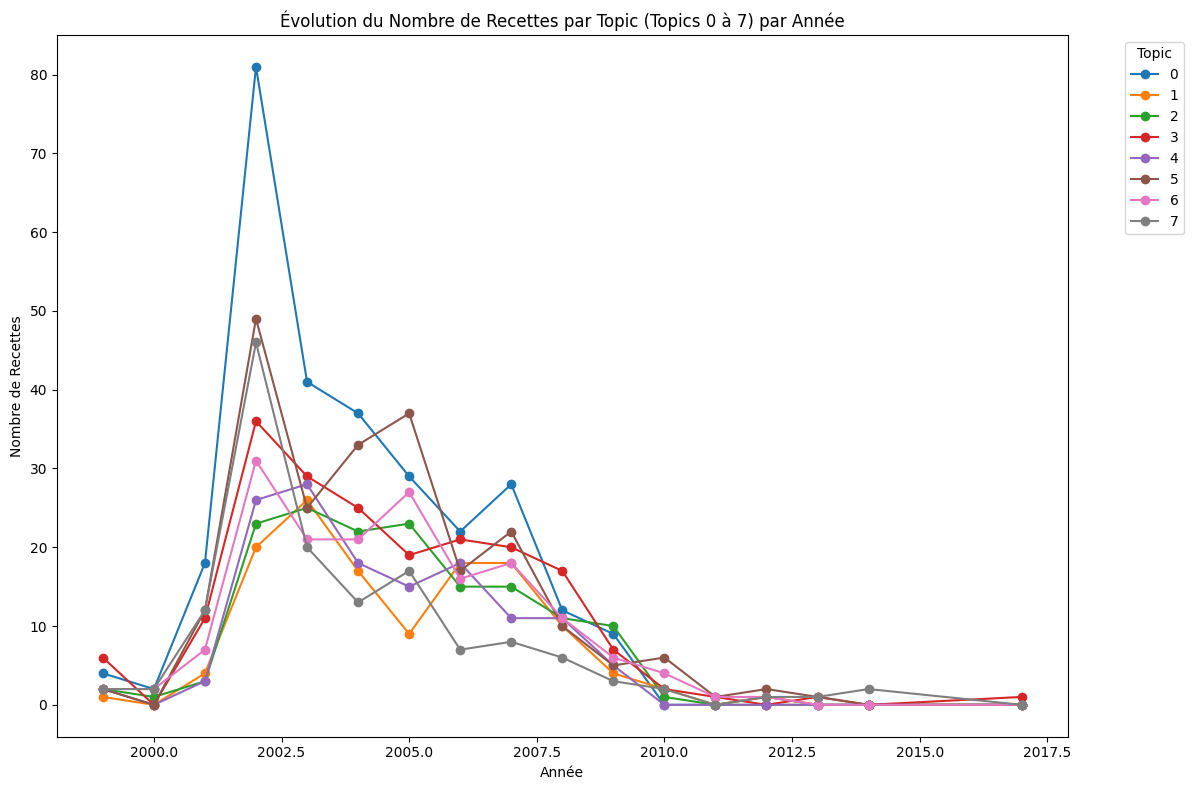

In [39]:


# Assurez-vous que 'submitted' est au format datetime
df_cluster['submitted'] = pd.to_datetime(df_cluster['submitted'])

# Extraire l'année de la date 'submitted'
df_cluster['year'] = df_cluster['submitted'].dt.year

# Filtrer le DataFrame pour inclure uniquement les topics de 0 à 7
df_filtered = df_cluster[df_cluster['topic'].isin(range(0, 8))]

# Regrouper par 'year' et 'topic' pour compter le nombre de recettes
df_grouped = df_filtered.groupby(['year', 'topic']).size().reset_index(name='n_recipes')

# Pivot pour avoir les années en index et les topics en colonnes
df_pivot = df_grouped.pivot(index='year', columns='topic', values='n_recipes').fillna(0)

# Tracer les données
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Évolution du Nombre de Recettes par Topic (Topics 0 à 7) par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Recettes')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Sur les noms de recettes

In [47]:
seed_topic_list = [
    ["chicken", "beef", "pork", "lamb"],  # Meats
    ["carrot", "broccoli", "spinach", "tomato"],  # Vegetables
    ["apple", "banana", "orange", "strawberry"],  # Fruits
    ["cake", "pie", "cookie", "muffin"],  # Pastries
    ["appetizer", "starter", "canape", "hors d'oeuvre"],  # Appetizers and Starters
    ["soup", "stew", "broth", "bisque"],  # Soups and Stews
    ["salad", "greens", "dressing", "vinaigrette"],  # Salads
    ["main course", "entree", "dish", "platter"],  # Main Dishes
    ["side dish", "accompaniment", "garnish", "sides"],  # Side Dishes
    ["dessert", "pudding", "sweet", "treat"],  # Desserts
    ["beverage", "drink", "cocktail", "juice"],  # Beverages
    ["breakfast", "brunch", "morning meal", "cereal"],  # Breakfast Dishes
    ["vegetarian", "meatless", "plant-based", "veggie"],  # Vegetarian Recipes
    ["vegan", "dairy-free", "egg-free", "plant-based"],  # Vegan Recipes
    ["gluten-free", "no gluten", "wheat-free", "celiac"],  # Gluten-Free Recipes
    ["dairy-free", "lactose-free", "milk-free", "non-dairy"],  # Dairy-Free Recipes
    ["low carb", "keto", "low carbohydrate", "atkins"],  # Low-Carb Recipes
    ["high protein", "protein-rich", "bodybuilding", "muscle"],  # High Protein Recipes
    ["beef", "steak", "ground beef", "roast"],  # Beef Dishes
    ["chicken", "poultry", "hen", "roast chicken"],  # Poultry Dishes
    ["seafood", "fish", "shrimp", "lobster"],  # Seafood Dishes
    ["pasta", "spaghetti", "noodles", "macaroni"],  # Pasta Dishes
    ["rice", "risotto", "pilaf", "paella"],  # Rice Dishes
    ["bread", "loaf", "baguette", "roll"],  # Breads and Bakery
    ["sauce", "gravy", "dressing", "dip"],  # Sauces and Condiments
    ["snack", "nibble", "munchies", "bite"],  # Snacks and Appetizers
    ["grill", "barbecue", "bbq", "smoke"],  # Grilling and BBQ
    ["bake", "oven", "roast", "pastry"],  # Baking Recipes
    ["slow cooker", "crockpot", "stew", "braise"],  # Slow Cooker Recipes
    ["pressure cooker", "instant pot", "quick cook", "fast"],  # Pressure Cooker Recipes
    ["one-pot", "one-pan", "easy cleanup", "simple"],  # One-Pot Meals
    ["casserole", "bake", "gratin", "hotdish"],  # Casseroles and Bakes
    ["sandwich", "wrap", "panini", "sub"],  # Sandwiches and Wraps
    ["pizza", "flatbread", "margherita", "pepperoni"],  # Pizza and Flatbreads
    ["souffle", "quiche", "custard", "flan"],  # Soufflés and Quiches
    ["tart", "pie", "pastry", "flan"],  # Savory and Sweet Tarts
    ["cookie", "biscuit", "shortbread", "gingerbread"],  # Cookies and Biscuits
    ["cake", "cupcake", "sponge", "layer cake"],  # Cakes and Pastries
    ["ice cream", "gelato", "sorbet", "frozen yogurt"],  # Ice Creams and Frozen Desserts
    ["smoothie", "shake", "blender", "frappe"],  # Smoothies and Juices
    ["cocktail", "mocktail", "martini", "margarita"],  # Cocktails and Mocktails
    ["tea", "coffee", "latte", "espresso"],  # Tea and Coffee Beverages
    ["asian", "chinese", "japanese", "korean"],  # Asian Cuisine
    ["italian", "pasta", "pizza", "risotto"],  # Italian Cuisine
    ["french", "croissant", "baguette", "ratatouille"],  # French Cuisine
    ["mexican", "taco", "enchilada", "quesadilla"],  # Mexican Cuisine
    ["indian", "curry", "masala", "naan"],  # Indian Cuisine
    ["middle eastern", "hummus", "falafel", "pita"],  # Middle Eastern Cuisine
    ["mediterranean", "olive", "feta", "tzatziki"],  # Mediterranean Cuisine
    ["african", "jollof", "injera", "tagine"],  # African Cuisine
    ["american", "burger", "hot dog", "fries"],  # American Cuisine
    ["british", "fish and chips", "shepherd's pie", "pudding"],  # British Cuisine
    ["spanish", "paella", "tapas", "gazpacho"],  # Spanish Cuisine
    ["thai", "pad thai", "green curry", "lemongrass"],  # Thai Cuisine
    ["chinese", "dumpling", "stir-fry", "sweet and sour"],  # Chinese Cuisine
    ["japanese", "sushi", "tempura", "ramen"],  # Japanese Cuisine
    ["korean", "kimchi", "bibimbap", "bulgogi"],  # Korean Cuisine
    ["german", "sauerkraut", "bratwurst", "pretzel"],  # German Cuisine
    ["greek", "gyros", "moussaka", "feta"],  # Greek Cuisine
    ["scandinavian", "smorrebrod", "gravlax", "meatballs"],  # Scandinavian Cuisine
    ["russian", "borscht", "blini", "pelmeni"],  # Russian Cuisine
    ["brazilian", "feijoada", "pão de queijo", "churrasco"],  # Brazilian Cuisine
    ["moroccan", "couscous", "tagine", "harira"],  # Moroccan Cuisine
    ["holiday", "celebration", "feast", "festive"],  # Holiday Recipes
    ["christmas", "gingerbread", "turkey", "eggnog"],  # Christmas Recipes
    ["easter", "lamb", "hot cross buns", "eggs"],  # Easter Recipes
    ["halloween", "pumpkin", "candy", "toffee"],  # Halloween Recipes
    ["thanksgiving", "stuffing", "cranberry", "pumpkin pie"],  # Thanksgiving Recipes
    ["valentine", "chocolate", "strawberries", "romantic"],  # Valentine's Day Recipes
    ["mother's day", "brunch", "flowers", "tea"],  # Mother's Day Recipes
    ["father's day", "bbq", "steak", "beer"],  # Father's Day Recipes
    ["new year", "champagne", "appetizers", "resolutions"],  # New Year's Recipes
    ["summer", "grill", "salad", "lemonade"],  # Summer Recipes
    ["autumn", "pumpkin", "apple", "spice"],  # Autumn Recipes
    ["winter", "stew", "soup", "hot chocolate"],  # Winter Recipes
    ["spring", "asparagus", "lamb", "peas"],  # Spring Recipes
    ["picnic", "sandwich", "fruit", "salad"],  # Picnic Recipes
    ["party", "finger food", "canapes", "dip"],  # Party Recipes
    ["kids", "fun", "easy", "snacks"],  # Recipes for Kids
    ["budget", "cheap", "affordable", "economical"],  # Budget Recipes
    ["quick", "easy", "fast", "simple"],  # Quick and Easy Recipes
    ["gourmet", "fine dining", "chef", "sophisticated"],  # Gourmet Recipes
    ["healthy", "nutrition", "low-fat", "whole grains"],  # Healthy Recipes
    ["comfort food", "hearty", "homestyle", "satisfying"],  # Comfort Foods
    ["street food", "taco", "kebab", "noodle"],  # Street Foods
    ["festive desserts", "cake", "pie", "tart"],  # Festive Desserts
    ["gluten-free baking", "almond flour", "coconut flour", "xanthan gum"],  # Gluten-Free Baking
    ["low-fat", "light", "diet", "skinny"],  # Low-Fat Recipes
    ["diabetic", "sugar-free", "low carb", "glycemic"],  # Diabetic Recipes
    ["lactose-free", "dairy-free", "soy milk", "almond milk"],  # Lactose-Free Recipes
    ["high fiber", "whole grain", "bran", "fiber-rich"],  # High Fiber Recipes
    ["paleo", "grain-free", "primal", "caveman"],  # Paleo Recipes
    ["ketogenic", "keto", "low carb", "high fat"],  # Keto Recipes
    ["raw food", "uncooked", "vegan", "living foods"],  # Raw Food Recipes
    ["fermented", "kimchi", "sauerkraut", "kombucha"],  # Fermented Foods
    ["superfood", "quinoa", "chia", "kale"],  # Superfood Recipes
    ["seafood appetizer", "shrimp cocktail", "oysters", "ceviche"],  # Seafood Appetizers
    ["meatless main", "vegetarian", "tofu", "eggplant"],  # Meatless Main Dishes
    ["egg dishes", "omelette", "scrambled", "frittata"],  # Egg Dishes
    ["cheese dishes", "fondue", "mac and cheese", "grilled cheese"],  # Cheese Dishes
    ["tofu", "soy", "tempeh", "seitan"],  # Tofu and Soy Recipes
    ["beans", "lentils", "chickpeas", "legumes"],  # Beans and Legumes
    ["grain-free", "paleo", "almond flour", "coconut flour"],  # Grain-Free Recipes
    ["whole grains", "brown rice", "quinoa", "oats"],  # Whole Grain Recipes
    ["vinaigrette", "dressing", "salad dressing", "balsamic"],  # Vinaigrettes
    ["marinade", "rub", "seasoning", "spice mix"],  # Marinades and Rubs
    ["breakfast cereal", "granola", "muesli", "oatmeal"],  # Breakfast Cereals
    ["pancake", "waffle", "crepe", "flapjack"],  # Pancakes and Waffles
    ["omelette", "frittata", "scramble", "quiche"],  # Omelettes and Frittatas
    ["sushi", "nigiri", "maki", "sashimi"],  # Sushi and Sashimi
    ["dumpling", "dim sum", "gyoza", "wonton"],  # Dumplings and Dim Sum
    ["tapas", "mezze", "small plates", "antipasti"],  # Tapas and Small Plates
    ["spicy", "hot", "chili", "pepper"],  # Spicy Recipes
    ["mild", "light", "delicate", "subtle"],  # Mild and Delicate Flavors
    ["herb", "basil", "thyme", "rosemary"],  # Herb-Based Recipes
    ["spice", "cumin", "cinnamon", "turmeric"],  # Spice-Based Recipes
    ["chocolate dessert", "brownie", "mousse", "truffle"],  # Chocolate Desserts
    ["fruit dessert", "cobbler", "crumble", "tart"],  # Fruit Desserts
    ["gelato", "sorbet", "frozen yogurt", "popsicle"],  # Gelato and Sorbets
    ["custard", "pudding", "crème brûlée", "flan"],  # Custards and Puddings
    ["mousse", "parfait", "whipped", "airy"],  # Mousses and Parfaits
    ["bread pudding", "custard", "raisin", "vanilla"],  # Bread Puddings
    ["traditional bread", "sourdough", "rye", "whole wheat"],  # Traditional Breads
    ["sourdough", "starter", "levain", "fermented"],  # Sourdough Recipes
    ["flatbread", "naan", "pita", "chapati"],  # Flatbreads and Naan
    ["crepe", "blini", "pancake", "galette"],  # Crepes and Blinis
    ["stuffed pasta", "ravioli", "tortellini", "manicotti"],  # Stuffed Pastas
    ["risotto", "paella", "arborio", "saffron"],  # Risotto and Paella
    ["stir-fry", "wok", "sauté", "quick cook"],  # Stir-Fries
    ["curry", "masala", "korma", "vindaloo"],  # Curries
    ["kebab", "skewer", "satay", "yakitori"],  # Kebabs and Skewers
    ["noodle dish", "ramen", "lo mein", "pad thai"],  # Noodle Dishes
    ["meal salad", "chicken salad", "tuna salad", "grain salad"],  # Meal Salads
    ["baked seafood", "fish fillet", "shrimp scampi", "lobster tail"],  # Baked Seafood
    ["steamed dish", "dim sum", "fish", "vegetables"],  # Steamed Dishes
    ["roasted vegetables", "root vegetables", "squash", "brussels sprouts"],  # Roasted Vegetables
    ["gratin", "au gratin", "cheesy", "baked"],  # Gratins
    ["preservation", "pickling", "canning", "fermenting"],  # Food Preservation
    ["pickle", "chutney", "relish", "sauerkraut"],  # Pickles and Chutneys
    ["jam", "jelly", "preserve", "marmalade"],  # Jams and Jellies
    ["canning", "jar", "preserving", "mason jar"],  # Canning and Jarring
    ["dehydrated", "dried fruit", "beef jerky", "fruit leather"],  # Dehydrated Foods
    ["vegan dessert", "dairy-free", "egg-free", "raw"],  # Vegan Desserts
    ["energy bar", "granola bar", "protein bar", "snack bar"],  # Energy Bars and Bites
    ["protein shake", "smoothie", "whey", "post-workout"],  # Protein Shakes
    ["meal prep", "batch cooking", "make ahead", "freezer meals"],  # Meal Prep Recipes
    ["seasonal soup", "gazpacho", "pumpkin soup", "minestrone"],  # Soups for All Seasons
    ["comfort stew", "beef stew", "chili", "goulash"],  # Comforting Stews
    ["chili", "con carne", "beans", "spicy"],  # Chili Recipes
    ["game meat", "venison", "rabbit", "wild boar"],  # Game Meat Recipes
    ["exotic", "truffle", "foie gras", "caviar"],  # Exotic Ingredients
    ["fusion", "tex-mex", "asian-fusion", "cross-cultural"],  # Fusion Cuisine
    ["restaurant-style", "copycat", "gourmet", "signature"],  # Restaurant-Style Recipes
    ["street food", "empanada", "spring roll", "arepa"],  # Street Foods from Around the World
    ["healthy snack", "nuts", "fruit", "yogurt"],  # Healthy Snacks
    ["on-the-go breakfast", "breakfast bar", "muffin", "wrap"],  # Grab-and-Go Breakfasts
    ["brunch favorite", "eggs benedict", "pancakes", "mimosa"],  # Brunch Favorites
    ["afternoon tea", "scone", "finger sandwich", "petit four"],  # Afternoon Tea Recipes
    ["traditional", "stew", "roast", "casserole"],  # Traditional Dishes
    ["family recipe", "heirloom", "passed down", "comfort"],  # Family Recipes
    ["grandma's recipe", "nostalgic", "old-fashioned", "classic"],  # Grandma's Recipes
    ["regional", "gumbo", "poutine", "sauerbraten"],  # Regional Specialties
    ["very spicy", "ghost pepper", "habanero", "scotch bonnet"],  # Very Spicy Dishes
    ["mild dish", "butter chicken", "creamy", "gentle flavors"],  # Mild Dishes
    ["savory snack", "chips", "nuts", "pretzels"],  # Savory Snacks
    ["sweet treat", "candy", "dessert", "chocolate"],  # Sweet Treats
    ["savory pastry", "sausage roll", "empanada", "pasty"],  # Savory Pastries
    ["international dessert", "baklava", "tiramisu", "gulab jamun"],  # International Desserts
    ["wedding cake", "tiered cake", "fondant", "white cake"],  # Wedding Cakes
    ["birthday cake", "layer cake", "frosting", "candles"],  # Birthday Cakes
    ["holiday cookies", "sugar cookies", "gingerbread", "shortbread"],  # Holiday Cookies
    ["gingerbread house", "decorating", "royal icing", "candy"],  # Gingerbread Creations
    ["chocolate making", "truffles", "ganache", "tempering"],  # Chocolate Making
    ["candy making", "fudge", "caramel", "toffee"],  # Confectionery
    ["herb preservation", "drying herbs", "herb oil", "herb vinegar"],  # Preserving Herbs
    ["homemade pasta", "fresh pasta", "pasta dough", "pasta machine"],  # Homemade Pasta
    ["dumpling wrapper", "wonton skin", "gyoza wrapper", "homemade"],  # Dumpling Wrappers
    ["vegetarian protein", "tofu", "beans", "lentils"],  # Vegetarian Proteins
    ["vegan baking", "egg substitute", "flax egg", "aquafaba"],  # Vegan Baking
    ["low sugar", "sugar substitute", "stevia", "erythritol"],  # Low Sugar Recipes
    ["sugar-free", "diabetic-friendly", "artificial sweetener", "no sugar"],  # Sugar-Free Recipes
    ["detox", "cleanse", "green juice", "smoothie"],  # Detox Recipes
    ["juice", "cold-pressed", "fruit juice", "vegetable juice"],  # Juice Recipes
    ["mocktail", "non-alcoholic", "smoothie", "punch"],  # Mocktails
    ["traditional drink", "chai", "matcha", "horchata"],  # Traditional Beverages
    ["smoothie bowl", "acai bowl", "toppings", "granola"],  # Smoothie Bowls
    ["breakfast muffin", "bran muffin", "blueberry muffin", "banana muffin"],  # Breakfast Muffins
    ["specialty bread", "focaccia", "brioche", "ciabatta"],  # Specialty Breads
    ["festive drink", "eggnog", "mulled wine", "cider"],  # Festive Beverages
    ["bbq sauce", "smoky", "sweet", "tangy"],  # BBQ Sauces
    ["mayonnaise", "aioli", "emulsion", "garlic mayo"],  # Mayonnaises and Aiolis
    ["spice blend", "curry powder", "garam masala", "taco seasoning"],  # Homemade Spice Blends
    ["gluten-free dessert", "almond flour cake", "flourless brownie", "meringue"],  # Gluten-Free Desserts
    ["alternative flour", "almond flour", "coconut flour", "buckwheat"],  # Alternative Flours
    ["nut-free", "seed butter", "sunflower seeds", "coconut"],  # Nut-Free Recipes
    ["allergen-free", "dairy-free", "gluten-free", "egg-free"],  # Allergen-Free Recipes
    ["baby food", "puree", "mashed", "soft"],  # Baby Recipes
    ["toddler meal", "finger food", "bite-sized", "soft"],  # Toddler Meals
    ["senior nutrition", "soft food", "easy to chew", "nutritious"],  # Nutrition for Seniors
    ["sports nutrition", "protein", "carb loading", "recovery"],  # Sports Nutrition
    ["food pairing", "wine pairing", "cheese pairing", "flavor combinations"],  # Food Pairings
    ["cooking technique", "sauteing", "braising", "blanching"],  # Cooking Techniques
]



df = pd.read_csv("../data/processed_data.csv")

documents = df['cleaned_name'].to_list()


from sentence_transformers import SentenceTransformer

# Spécifiez le modèle que vous souhaitez utiliser
embedding_model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

n_gram_range = (1, 2)

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=100, prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model, seed_topic_list=seed_topic_list, n_gram_range = n_gram_range, top_n_words = 5 ,language="english", embedding_model=embedding_model, nr_topics=160)


n_topics = 0
while n_topics < 10:
    topics, probs = topic_model.fit_transform(documents)
    n_topics = len(set(topics))
df['topic'] = topics
df['probs'] = probs
    # Afficher les topics les plus fréquents
print(topic_model.get_topic_info())



print(topic_model.get_topic(-1)) 
# Visualisation des topics
topic_model.visualize_topics()

# Visualisation des hiérarchies entre les topics
topic_model.visualize_hierarchy()


# Visualisation des relations entre les topics
topic_model.visualize_barchart(n_words=10, height=400, width=400)

topic_model.save("../models/model_cluster_name", save_embedding_model=True)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2


     Topic  Count                                               Name  \
0       -1  60242                    -1_salad_chocolate_cookies_soup   
1        0  10066                           0_spicy_sauce_chili_stir   
2        1   7025                           1_sausage_stew_pot_crock   
3        2   5847          2_mushrooms_mushroom_broccoli_cauliflower   
4        3   3805                               3_punch_dip_la_pollo   
..     ...    ...                                                ...   
155    154    105    154_pizza pizza_pizza_pizza pizzas_pizzas pizza   
156    155    105              155_england_welsh_london_england clam   
157    156    104       156_carb_carb carb_carb chicken_chicken carb   
158    157    103  157_enchiladas_enchiladas enchiladas_enchilada...   
159    158    102                      158_mein_lo mein_chow mein_lo   

                                        Representation  \
0               [salad, chocolate, cookies, soup, pie]   
1             [spic

2024-12-04 15:38:11,903 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [2]:
from bertopic import BERTopic

topic_model_test = BERTopic.load("../models/model_cluster_name")

topic_model_test.visualize_barchart(n_words=10,autoscale=True)

In [49]:
topic_model_test.visualize_hierarchy()

In [50]:
fig = topic_model_test.visualize_hierarchy()

fig.write_html("visualization.html")

In [51]:
topic_model_test.visualize_topics()

In [52]:
fig = topic_model_test.visualize_topics()

fig.write_html("visualization_topics.html")

In [ ]:
df = pd.read_csv("../data/processed_data.csv")  
import ast

df['rating'] = df['rating'].apply(lambda x: ast.literal_eval(x))

df['n_comments'] = df['rating'].apply(lambda x: len(x))

#filter pour garder que les recettes qui ont plus de 10 commentaires
df = df[df['n_comments'] > 12]

df_cluster= pd.DataFrame()
#passer les descriptions dans Bertopic
df_cluster = df[['name','cleaned_name', 'rating', 'submitted']].sample(n=10000)
documents = df_cluster['cleaned_name'].to_list()
topics, probs = model_topic_bert.transform(documents)
df_cluster['cleaned_name'] = documents
df_cluster['topic'] = topics


In [54]:
df_cluster = df_cluster[df_cluster['topic'] != -1]

In [55]:
df_cluster.reset_index(drop=True, inplace=True)


In [56]:
df_cluster

,name,cleaned_name,rating,submitted,topic
0,mama s angel hair pie spaghetti pie for two,"['mama', 'hair', 'pie', 'spaghetti']","[4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5]",2007-09-18,16
1,grandma s cheese straws,"['grandma', 'straws']","[5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, ...",2004-05-30,0
2,cheesy salsa dip,"['cheesy', 'salsa', 'dip']","[5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5]",2002-10-14,39
3,no bake chocolate cover cherry oatmeal cookies,"['bake', 'chocolate', 'cover', 'cookies']","[4, 5, 5, 5, 5, 5, 5, 0, 5, 0, 0, 5]",2006-03-08,9
4,black forest pizza,['pizza'],"[5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5]",2002-10-22,47
...,...,...,...,...,...
4222,vegan caesar salad dressing,"['caesar', 'salad']","[5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",2005-10-29,4
4223,healthy applesauce pancakes with no sugar added,"['applesauce', 'pancakes', 'sugar']","[5, 5, 5, 1, 0, 1, 1, 4, 1, 0, 3, 0, 2]",2012-02-28,46
4224,zankou chicken s lebanese garlic sauce copycat,"['zankou', 'chicken', 'sauce', 'copycat']","[4, 5, 0, 5, 5, 5, 5, 5, 0, 5, 4, 5, 5, 5, 5, ...",2006-12-05,53
4225,grilled summer squash with fettuccine,"['summer', 'squash', 'fettuccine']","[5, 5, 5, 5, 4, 5, 5, 0, 5, 5, 5]",2006-03-09,24


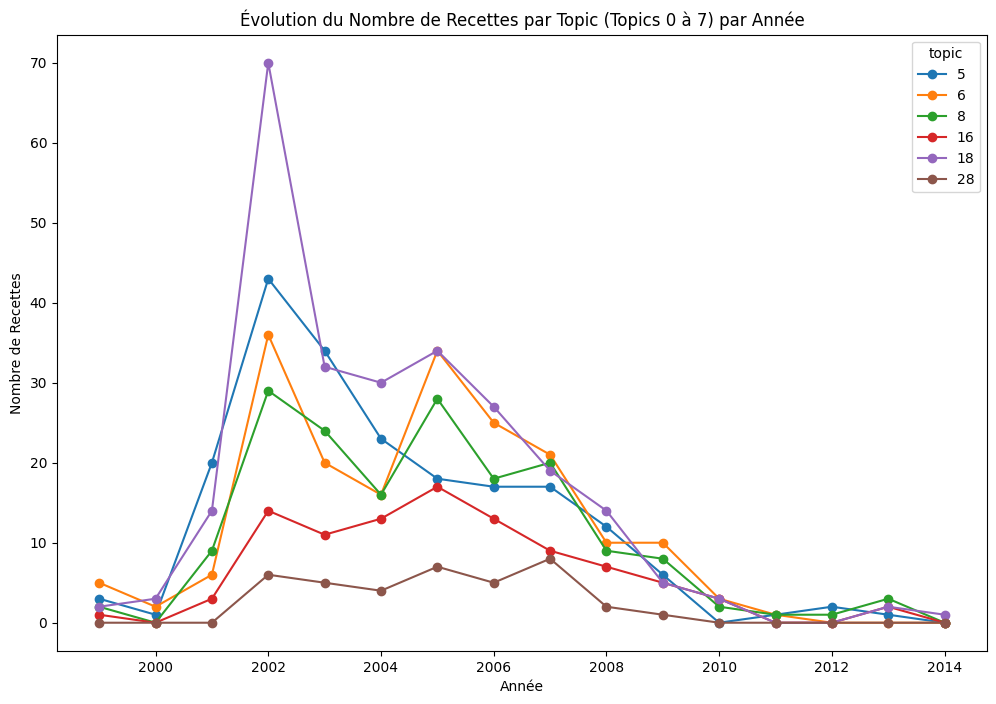

In [ ]:


# Assurez-vous que 'submitted' est au format datetime
df_cluster['submitted'] = pd.to_datetime(df_cluster['submitted'])

# Extraire l'année de la date 'submitted'
df_cluster['year'] = df_cluster['submitted'].dt.year

# Filtrer le DataFrame pour inclure uniquement les topics de 0 à 7
df_filtered = df_cluster[df_cluster['topic'].isin([2,5,6,16,8,18,28])]
#df_filtered = df_cluster[df_cluster['topic'].isin([2,5,6,16,8,18,28])]

# Regrouper par 'year' et 'topic' pour compter le nombre de recettes
df_grouped = df_filtered.groupby(['year', 'topic']).size().reset_index(name='n_recipes')

# Pivot pour avoir les années en index et les topics en colonnes
df_pivot = df_grouped.pivot(index='year', columns='topic', values='n_recipes').fillna(0)

# Tracer les données
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Évolution du Nombre de Recettes par Topic (Topics 0 à 7) par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Recettes')

plt.show()


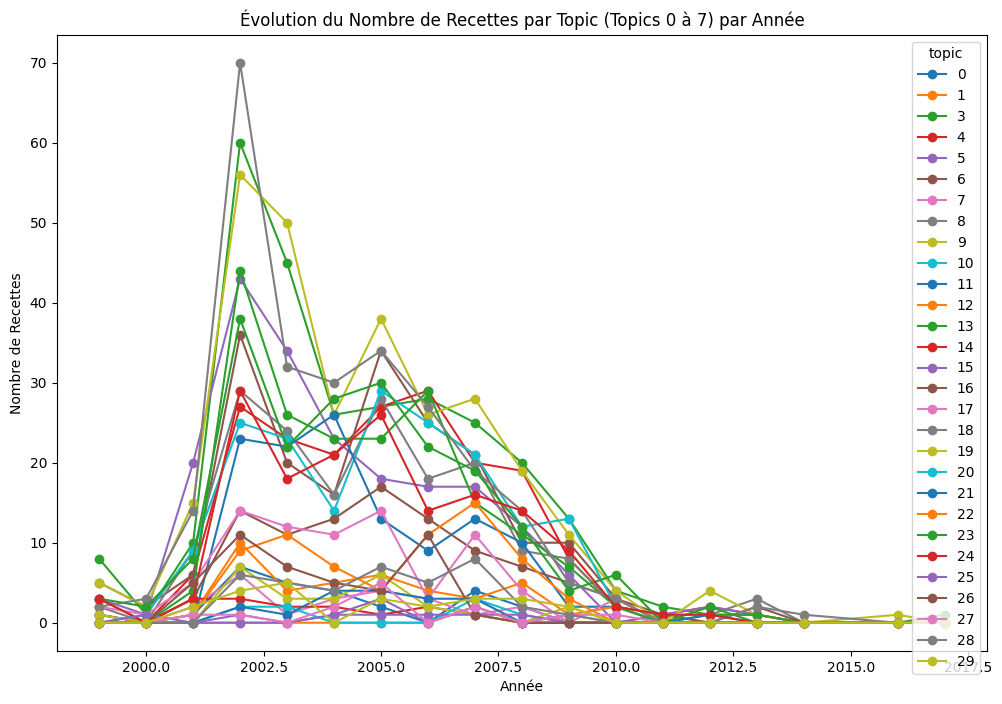

In [67]:
# Assurez-vous que 'submitted' est au format datetime
df_cluster['submitted'] = pd.to_datetime(df_cluster['submitted'])

# Extraire l'année de la date 'submitted'
df_cluster['year'] = df_cluster['submitted'].dt.year

# Filtrer le DataFrame pour inclure uniquement les topics de 0 à 7
df_filtered = df_cluster[df_cluster['topic'].isin(range(0,30))]

# Regrouper par 'year' et 'topic' pour compter le nombre de recettes
df_grouped = df_filtered.groupby(['year', 'topic']).size().reset_index(name='n_recipes')

# Pivot pour avoir les années en index et les topics en colonnes
df_pivot = df_grouped.pivot(index='year', columns='topic', values='n_recipes').fillna(0)

# Tracer les données
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Évolution du Nombre de Recettes par Topic (Topics 0 à 7) par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Recettes')

plt.show()


In [ ]:


df_topics_model = topic_model_test.get_topic_info()

[('salad', 0.009371679596376607), ('chocolate', 0.008276077321231147), ('cookies', 0.006818788173717431), ('soup', 0.006397309909567572), ('pie', 0.006070562545471504)]


In [76]:
df_topics_model = df_topics_model[df_topics_model['Topic'] != -1]

In [ ]:
df_topics_model

,Topic,Count,Name,Representation,Representative_Docs
1,0,10066,0_spicy_sauce_chili_stir,"[spicy, sauce, chili, stir, sauce spicy]","[['stir', 'fry'], ['stir', 'fry'], ['stir', 'f..."
2,1,7025,1_sausage_stew_pot_crock,"[sausage, stew, pot, crock, crock pot]","[['crock', 'pot', 'beef', 'stew'], ['beef', 's..."
3,2,5847,2_mushrooms_mushroom_broccoli_cauliflower,"[mushrooms, mushroom, broccoli, cauliflower, b...","[['mushroom'], ['mushrooms'], ['mushrooms']]"
4,3,3805,3_punch_dip_la_pollo,"[punch, dip, la, pollo, pesto]","[['island', 'fruit', 'punch'], ['wine', 'punch..."
5,4,3422,4_pork_pork chops_chops_pork tenderloin,"[pork, pork chops, chops, pork tenderloin, cho...","[['pork', 'chops'], ['pork', 'chops'], ['pork'..."
...,...,...,...,...,...
155,154,105,154_pizza pizza_pizza_pizza pizzas_pizzas pizza,"[pizza pizza, pizza, pizza pizzas, pizzas pizz...","[['pizza'], ['pizza'], ['pizza']]"
156,155,105,155_england_welsh_london_england clam,"[england, welsh, london, england clam, london ...","[['england', 'clam', 'chowder'], ['england', '..."
157,156,104,156_carb_carb carb_carb chicken_chicken carb,"[carb, carb carb, carb chicken, chicken carb, ...","[['carb'], ['carb'], ['carb', 'carb']]"
158,157,103,157_enchiladas_enchiladas enchiladas_enchilada...,"[enchiladas, enchiladas enchiladas, enchilada,...","[['enchiladas'], ['enchiladas'], ['enchiladas'..."


In [78]:
df_topics_model.to_csv("../data/topics_model.csv", index=False)